In [5]:
import torch
import torch.nn as nn
import DataLoader
import time
import numpy as np
import matplotlib.pyplot as plt
from Classifier import DigitClassifier

loader = DataLoader

In [6]:
model = DigitClassifier()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    start = time.time()
    for image, labels in loader.train_dataloader:
        images = torch.reshape(image, (-1, 784))
        optimizer.zero_grad()
        output = model(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
    end = time.time()
    print(f"Epoch {epoch+1} - Training Loss: {running_loss/len(loader.train_dataloader)} {end-start}")     
    
torch.save(model.state_dict(), "Digit_classifier.pth")

Epoch 1 - Training Loss: 1.5783915519714355 2.677384614944458
Epoch 2 - Training Loss: 1.515613079071045 2.830172061920166
Epoch 3 - Training Loss: 1.4995156526565552 2.8814260959625244
Epoch 4 - Training Loss: 1.4905201196670532 2.905071973800659
Epoch 5 - Training Loss: 1.4848743677139282 2.92141056060791


In [7]:
model.eval()
correct_predictions = 0
total_predictions = 0
with torch.no_grad():
    for image, labels in loader.test_dataloader:
        images = torch.reshape(image, (-1, 784))
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy on the test set: {accuracy}%")

Accuracy on the test set: 97.02%


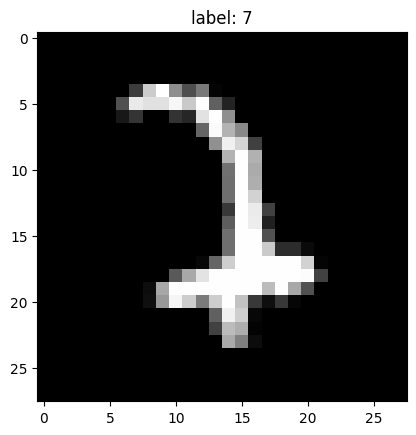

In [8]:
data_iter = iter(loader.test_dataloader)
image, label = next(data_iter)
image = np.reshape(image[0], (28, 28))
plt.imshow(image, cmap="gray")
plt.title(f"label: {label[0]}")
plt.show()